<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/TP3_TP4_Traitement_Image_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*TP 3  et TP 4 Traitement d'image : FAHMI DJOBBI**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from skimage import data, img_as_float
from skimage import exposure

from matplotlib import image
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  as cv 
import numpy as np
import pandas as pd

'/content/drive/MyDrive/Colab Notebooks/images2021/stretch_original.jpg'


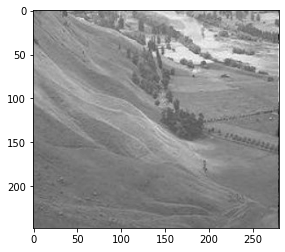

In [2]:

!ls "/content/drive/MyDrive/Colab Notebooks/images2021/stretch_original.jpg"
img = plt.imread("/content/drive/MyDrive/Colab Notebooks/images2021/stretch_original.jpg")
plt.imshow(img,cmap='gray')


Text(0.5, 1.0, 'hist org')

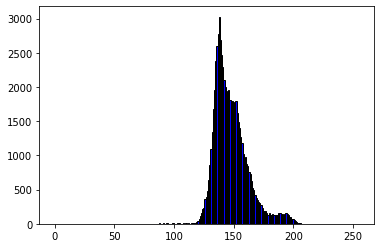

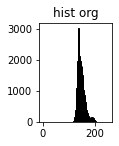

In [3]:

plt.figure()
plt.hist(img.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.figure()
plt.subplot(241)

plt.hist(img.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.title('hist org')

Text(0.5, 1.0, 'Contrast stretching')

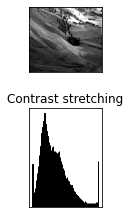

In [5]:
# Contrast stretching
p2,p98=np.percentile(img,(2,98))
img_rescale =exposure.rescale_intensity(img,in_range=(p2,p98))
plt.subplot(242)
plt.imshow(img_rescale,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(246)
plt.hist(img_rescale.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.xticks([]), plt.yticks([])
plt.title('Contrast stretching')


Text(0.5, 1.0, 'Equalization')

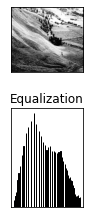

In [6]:
# Equalization
img_eq=255*exposure.equalize_hist(img)
plt.subplot(243)
plt.imshow(img_eq,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(247)
plt.hist(img_eq.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.xticks([]), plt.yticks([])
plt.title('Equalization')

Text(0.5, 1.0, 'Adaptive Equalization')

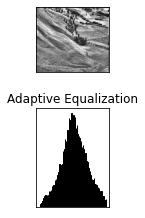

In [7]:
#adaptation
img_adapteq = 255*exposure.equalize_adapthist(img, clip_limit=0.03)
plt.subplot(244)
plt.imshow(img_adapteq,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(248)
plt.hist(img_adapteq.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.xticks([]), plt.yticks([])
plt.title('Adaptive Equalization')


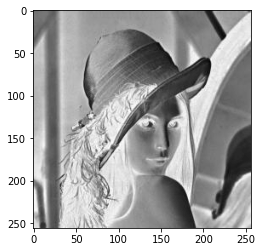

In [8]:
#inversion des niveau 
img = plt.imread("/content/drive/MyDrive/Colab Notebooks/images2021/lena.bmp")
imgn=255-img
plt.figure()
plt.imshow(imgn,cmap='gray')


[[4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 ...
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]]


(<matplotlib.image.AxesImage at 0x7f0d023d8d50>,
 Text(0.5, 1.0, 'retine mask'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

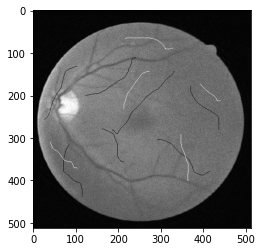

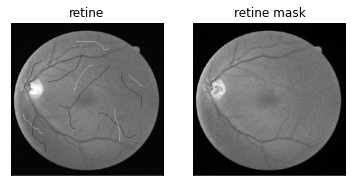

In [9]:
#corriger les griffe et taches noir et blanc 
#technique de masquage 

img = plt.imread("/content/drive/MyDrive/Colab Notebooks/images2021/retine.bmp")
plt.figure()
plt.imshow(img,cmap='gray')
m,n=img.shape
imgm=np.zeros((m,n))
for i in range(m):
  for j in range(n):
    if img[i,j]==0 or img[i,j]==255:
        imgm[i,j] =128
    else:
         imgm[i,j]=img[i,j]
print(imgm) 
plt.figure()
plt.subplot(121)
plt.imshow(img,cmap='gray'), plt.title('retine'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(imgm,cmap='gray'), plt.title('retine mask'), plt.xticks([]), plt.yticks([])


TP 4 : FAHMI DJOBBI

In [10]:
from skimage import data, img_as_float
from skimage import exposure
from matplotlib import image
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  as cv 
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2  as cv
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio


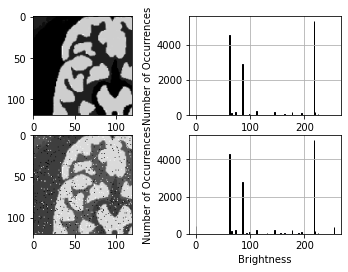

In [11]:
img2 = plt.imread("/content/drive/MyDrive/Colab Notebooks/images2021/Hoffman.bmp")[30:150,30:150]
#img=random_noise(img0,mode='s&p')
img = random_noise(img2,mode='s&p')
img=np.uint8(255*img)

plt.figure()
plt.subplot(221)
plt.imshow(img2,cmap='gray')
plt.subplot(223)
plt.imshow(img,cmap='gray')
 
plt.subplot(222)
plt.hist(img2.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid()

plt.subplot(224)
plt.hist(img.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid()


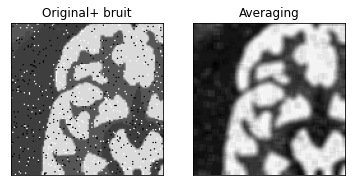

In [12]:
#2d convolution 
import cv2  
kernel=np.ones((5,5))/25
blur = cv2.filter2D(img,-1,kernel)
plt.figure()
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original+ bruit')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


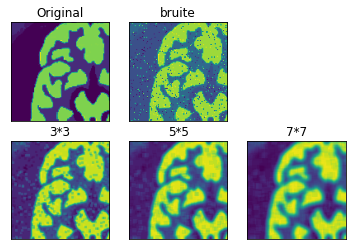

In [13]:
#averging
blur1=cv2.blur(img,(3,3))
blur2=cv2.blur(img,(5,5))
blur3=cv2.blur(img,(7,7))

plt.figure()
plt.subplot(231),plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img),plt.title('bruite')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(blur1),plt.title('3*3')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(blur2),plt.title('5*5')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(blur3),plt.title('7*7')
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
psnr1 = peak_signal_noise_ratio(img2, blur1)
print(psnr1)
psnr2 = peak_signal_noise_ratio(img2, blur2)
print(psnr2)
psnr3 = peak_signal_noise_ratio(img2, blur3)
print(psnr3)


23.138843130847754
21.579664145288326
19.92738256621017


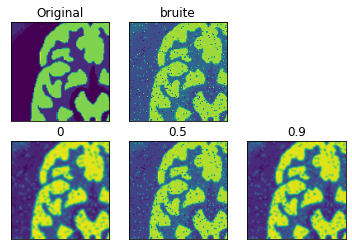

In [15]:
#filte guassien mieux que le filtre moyen 

blur1=cv2.GaussianBlur(img,(5,5),0)
blur2=cv2.GaussianBlur(img,(5,5),0.5)
blur3=cv2.GaussianBlur(img,(5,5),0.9)

plt.figure()
plt.subplot(231),plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img),plt.title('bruite')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(blur1),plt.title('0')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(blur2),plt.title('0.5')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(blur3),plt.title('0.9')
plt.xticks([]), plt.yticks([])
plt.show()


**filtre gaussien** et **filtre moyen** sont lineaire dans l'espace spacial 
par contre **filtre mediane** est non lineaire dans l'espace spatial 

In [16]:
psnr1 = peak_signal_noise_ratio(img2, blur1)
print(psnr1)
psnr2 = peak_signal_noise_ratio(img2, blur2)
print(psnr2)
psnr3 = peak_signal_noise_ratio(img2, blur3)
print(psnr3)


23.41607833310785
21.40735779797776
23.70946309666629


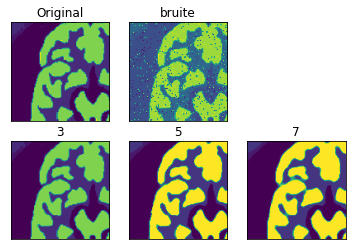

29.898833600340925
26.421121062748124
23.745064805113735


In [17]:
#filtre mediane

blur1=cv2.medianBlur(img,3)
blur2=cv2.medianBlur(img,5)
blur3=cv2.medianBlur(img,7)

plt.figure()
plt.subplot(231),plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img),plt.title('bruite')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(blur1),plt.title('3')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(blur2),plt.title('5')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(blur3),plt.title('7')
plt.xticks([]), plt.yticks([])
plt.show()
psnr1 = peak_signal_noise_ratio(img2, blur1)
print(psnr1)
psnr2 = peak_signal_noise_ratio(img2, blur2)
print(psnr2)
psnr3 = peak_signal_noise_ratio(img2, blur3)
print(psnr3)